# `BottomSheetLayout`
- `BSB.from()`
- `BSB.setBottomSheetCallback()`
  - `onStateChanged()`
  - `onSlide()`
- `BSB.setState()`
  - `BSB.STATE_DRAGGING`
  - `BSB.STATE_SETTLING`
  - `BSB.STATE_EXPANDED`
  - `BSB.STATE_COLLAPSED`
  - `BSB.STATE_HIDDEN`

In [4]:
from google.colab import drive
drive.mount('here')

Mounted at here


In [1]:
import cv2  
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import os 

In [2]:
def show_img(path, cvtColor=False, resize=None):
    img = cv2.imread(path)
    
    if (cvtColor == True):
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    if (type(resize) == tuple):
        img = cv2.resize(img, dsize=(0,0), fx=resize[0], fy=resize[1])
    elif (resize == None):
        pass
        
    cv2_imshow(img)


def get_img(path, cvtColor=False, resize=None):
    img = cv2.imread(path)
    
    if (cvtColor == True):
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    if (type(resize) == tuple):
        img = cv2.resize(img, dsize=(0,0), fx=resize[0], fy=resize[1])
    elif (resize == None):
        pass

    return img  


In [7]:
class NoteTaker:

    ROOT_DIR = "/content/here/MyDrive/Android/"
    CHILD_DIRS = ["UI", "Java"]
    parent_dir = ""
    java_path = ""
    ui_path = ""

    def __init__(self, learn_topic):
        self.parent_dir = learn_topic + "/"
        self.ui_path = self.parent_dir + self.CHILD_DIRS[0] + "/"
        self.java_path = self.parent_dir + self.CHILD_DIRS[1] + "/"
        self.set_dirs()


    def set_dirs(self):
        os.chdir(self.ROOT_DIR)
        os.makedirs(self.ROOT_DIR + self.parent_dir)
        for CHILD_DIR in self.CHILD_DIRS:
            os.makedirs(self.ROOT_DIR + self.parent_dir + CHILD_DIR)


    def list_files(self):
        list_UI = os.listdir(self.ui_path)
        list_Java = os.listdir(self.java_path)

        return list_UI, list_Java

    
    def get_script(self):
        list_UI, list_Java = self.list_files()

        for item in list_UI:
            print(f'path = "{self.ui_path + item}"')
            print('show_img(path)')
        
        print('')
        for item in list_Java:
            print(f'path = "{self.java_path + item}"')
            print('show_img(path)')

In [11]:
nt.get_script()

path = "BottomSheet - Modal/UI/result.png"
show_img(path)

path = "BottomSheet - Modal/Java/NullPointerException.png"
show_img(path)
path = "BottomSheet - Modal/Java/type casting.png"
show_img(path)
path = "BottomSheet - Modal/Java/casting required.png"
show_img(path)
path = "BottomSheet - Modal/Java/a must implementation.png"
show_img(path)


In [ ]:
path = "BottomSheet - Modal/UI/result.png"
show_img(path, resize=(0.5,0.5))

**Notes and Reference**

My personal Android dev learning notebook.

- Coding in Flow (2018) Modal Bottom Sheet - Android Studio Tutorial https://www.youtube.com/watch?v=IfpRL2K1hJk&ab_channel=CodinginFlow

# 1 UI

## `CoordinatorLayout` NOT necessary
This LayOut is not needed because the BottomSheet doesn't belong to the layout.

In [ ]:
# This layout is NOT needed because the layout design is different. 
<androidx.coordinatorlayout.widget.CoordinatorLayout>

# 2 `Java`

## Type casting
- as a way to communicate between `Activity` and `Fragment`

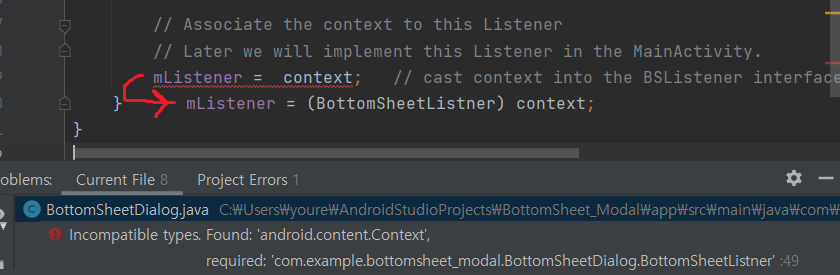

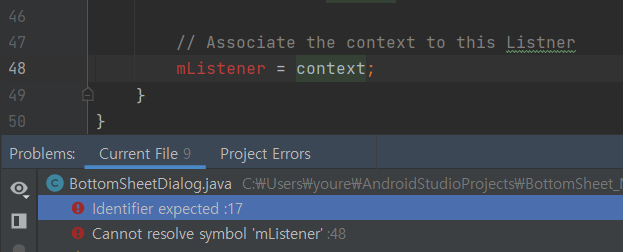

In [19]:
path1 = "BottomSheet - Modal/Java/type casting.png"
path2 = "BottomSheet - Modal/Java/casting required.png"
show_img(path1)
print()
show_img(path2)

## `interface` & `implementation`

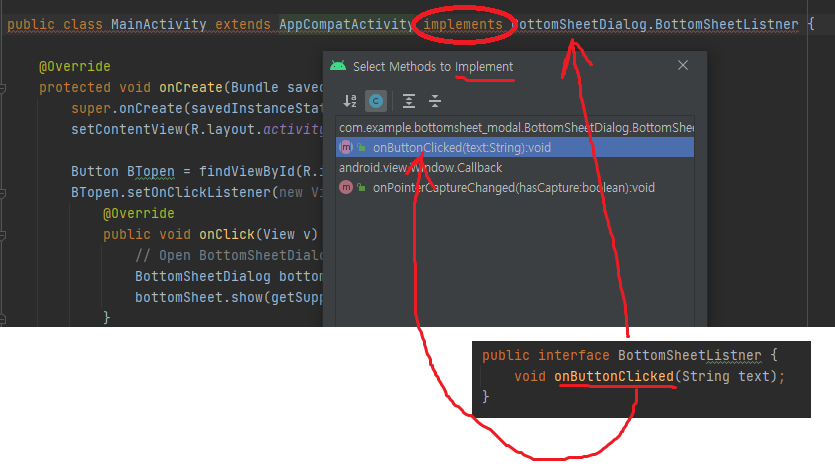

In [17]:
path = "BottomSheet - Modal/Java/a must implementation.png"
show_img(path)

## `BottomSheetDialog`

### `View` and `Behavior` objects
1. Associate the resource idea of the custom layout.
2. Here need to create an `interface`.
3. Create a member variable for the `BottomSheetListner`.
4. Associate `Activity` - `buttonClicks`
  - 1) Then we have to assign this variable to the `Activity` where we want to send out button clicks to.

In [ ]:
private BottomSheetBehavior BSBehavior;
View bottomSheet = findViewById(R.id.bottom_sheet);

BSBehavior = BottomSheetBehavior.from(bottomSheet);

## `setOnClickListener(new OnClickListener(){})`
- `OnclickListener` is an `interface(Listener)` and `setOnClickListener()` is a method that needs a object of type `onClickListener`. We can create class anonymously. ie, done by calling a class of no name (ANONYMOUS CLASS DECLARATION) which implements `OnClickListener` and thus it will have to implement void `onClick` method. Thus we will have the object of type interface and this is used for shorthand programming. For further clearance about anonymous class please visit http://www.techartifact.com/blogs/2009/08/anonymous-classes-in-java.html
- setOnClickListener takes an OnClickListener object as the parameter. Basically it's creating an anonymous subclass OnClickListener in the parameter.  (by Nitin Dominic)  
It's like the same in java when you can create a new thread with an anonymous subclass, ex: (by triad)

https://stackoverflow.com/questions/9577338/setonclicklistenernew-onclicklistener

In [ ]:
Thread t = new Thread(new Runnable()
    {     
        public void run(){...}
    });

## Communication from `Fragment` to underlying `Activity`
1. Create an `interface`.

In [ ]:
    public interface BottomSheetListner {
        void onButtonClicked(String text);
    }

2. Set `Activity` as a `Listener` to the `interface`. 

In [ ]:
public class BottomSheetDialog extends BottomSheetDialogFragment {

    private BottomSheetListner mListener;   # mListener here is the MainActivity.

3. Then call the `interface` method on the `Listener` (which is the `MainActivity`)

In [ ]:
BT1.setOnClickListener(new View.OnClickListener() {
            @Override
            public void onClick(View v) {
                mListener.onButtonClicked("Button 1 clicked");  # this string will be sent to MainActivity and associated with TextView for MainActivity.
                dismiss();
            }
        });

# Error Notes

## `NullPointerException`
- Don't forget to associate it with real objects! (Bring them to life!)

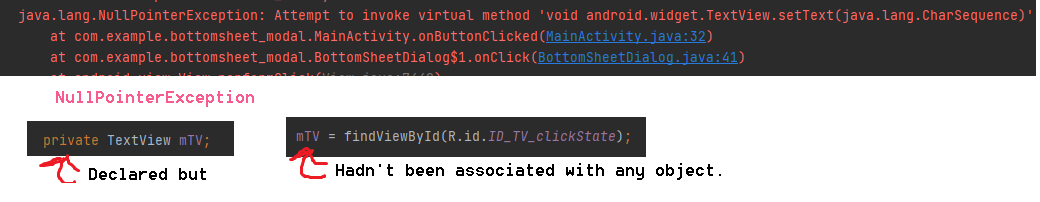

In [14]:
path = "BottomSheet - Modal/Java/NullPointerException.png"
show_img(path)